------------------------------
#### understanding relations
------------------------

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the Iris dataset
iris = sns.load_dataset("iris")

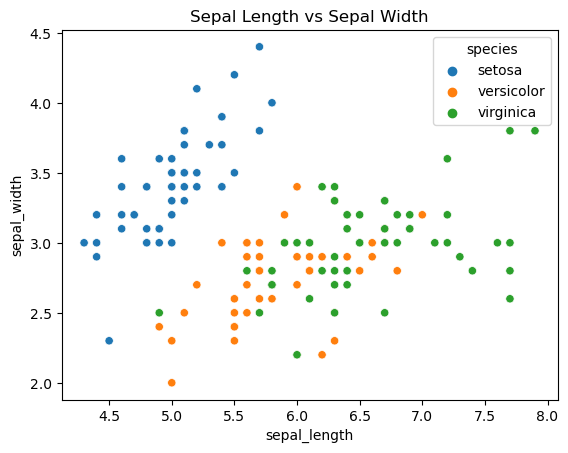

In [3]:
# Create scatter plots for different feature combinations
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris, hue="species")
plt.title("Sepal Length vs Sepal Width")
plt.show()


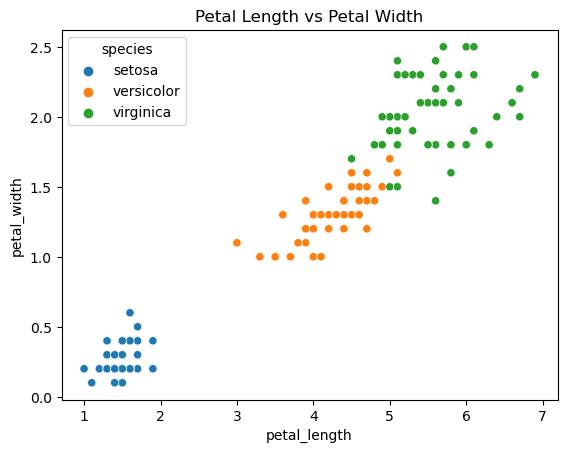

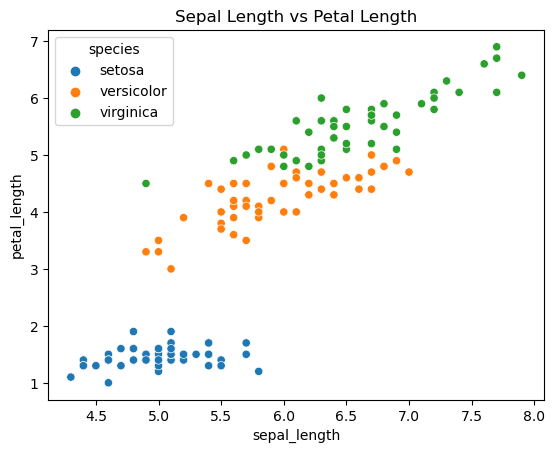

In [4]:
sns.scatterplot(x="petal_length", y="petal_width", data=iris, hue="species")
plt.title("Petal Length vs Petal Width")
plt.show()

sns.scatterplot(x="sepal_length", y="petal_length", data=iris, hue="species")
plt.title("Sepal Length vs Petal Length")
plt.show()

##### Draw inferences based on the plots
- Sepal Length vs Sepal Width: Some separation between species, especially with setosa having smaller sepal width.
- Petal Length vs Petal Width: Clear separation between species, linear relationship particularly noticeable with setosa.
- Sepal Length vs Petal Length: Clear separation between species, especially between setosa and the other two species.



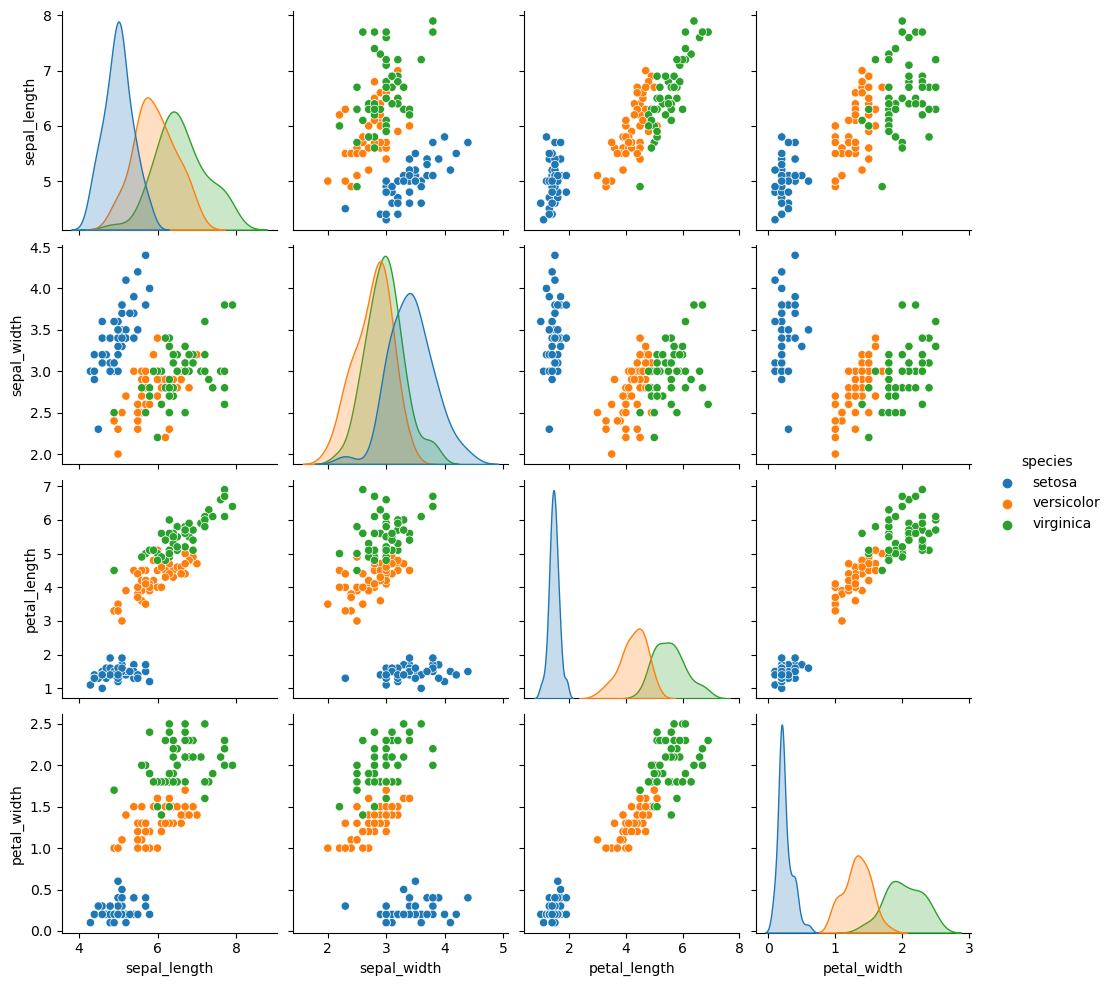

In [5]:
# Create pair plots
sns.pairplot(iris, hue="species")

**what if the input data is always in a fixed range**

In [ ]:
ctr = 0

start_range  = 11
finish_range = 20

for ctr in range(50):
    
    data = np.random.randint(start_range, finish_range, size=(5,2))

    x_bar = np.round(np.mean(data[:, 0]), 4)
    y_bar = np.round(np.mean(data[:, 1]), 4)

    df = pd.DataFrame(data, columns=['x1', 'x2'])

    df['x1-mean'] = df.x1 - x_bar
    df['x2-mean'] = df.x2 - y_bar

    df['x1x2']    = (df.x1 - x_bar) * (df.x2 - y_bar)

    cov = np.sum(df.x1x2)/(df.shape[0]-1)

    # Calculate covariance matrix
    cov_matrix = np.cov(df.x1, df.x2)

    # Extract covariance value
    covariance = cov_matrix[0, 1]

    # Calculate standard deviations
    stddev_x = df.x1.std()
    stddev_y = df.x2.std()

    # Calculate correlation coefficient
    correlation = covariance / (stddev_x * stddev_y)

    print('Iteration : {}, covariance = {:8.4f}'.format(ctr, covariance))

- When both variables have the same units and similar magnitudes, covariances are easy to compare . 

- However, when the variables have different units or scales, assessing the covariances can be difficult in terms of strength

> that is we divide the COV with std dev of x and y

In [41]:
import numpy as np
import pandas as pd

# Generate synthetic data
np.random.seed(42)
hours_studied = np.random.randint(1, 6, 50)
exam_scores   = hours_studied * 10 + np.random.normal(0, 5, 50)

# Create a DataFrame
data = pd.DataFrame({'Hours_Studied': hours_studied, 'Exam_Scores': exam_scores})

# Calculate the correlation coefficient
correlation_coefficient = data['Hours_Studied'].corr(data['Exam_Scores'])

print("\nCorrelation Coefficient:", correlation_coefficient)


Correlation Coefficient: 0.9495798944178822


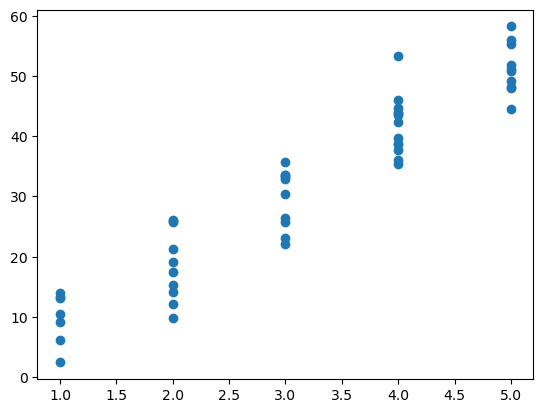

In [43]:
plt.scatter(data['Hours_Studied'], data['Exam_Scores']);

#### Non linear data

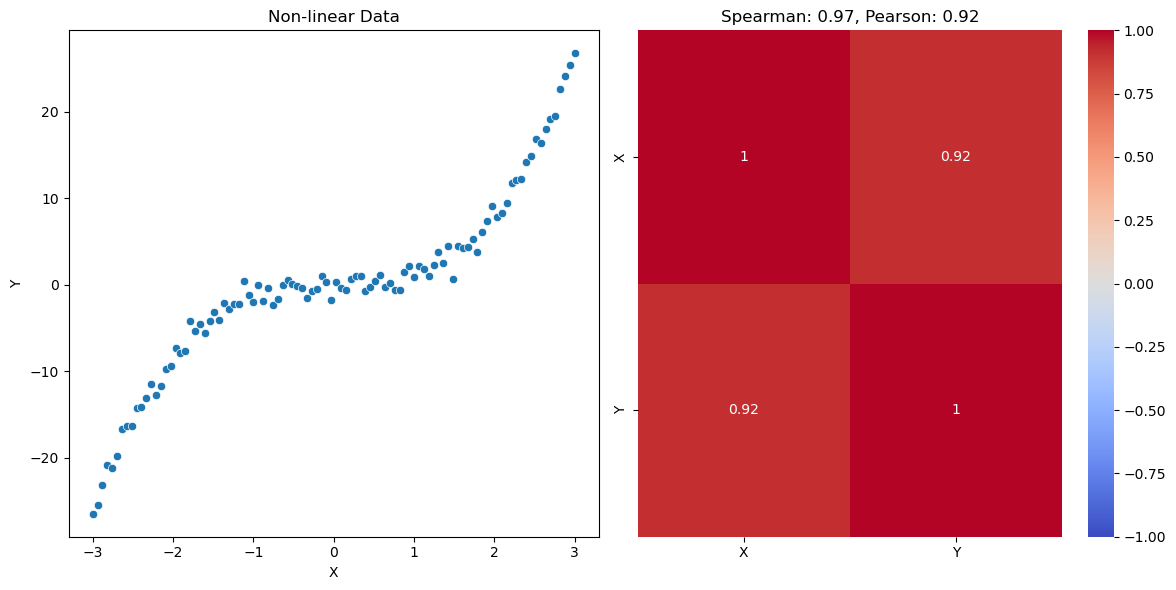

Spearman Correlation for Non-linear Data: 0.9708850885088509
Pearson Correlation for Non-linear Data: 0.9207274219194304


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate non-linear data
x_nonlinear = np.linspace(-3, 3, 100)
y_nonlinear = x_nonlinear**3 + np.random.normal(0, 1, 100)

# Create a DataFrame for non-linear data
data_nonlinear = pd.DataFrame({'X': x_nonlinear, 'Y': y_nonlinear})

# Compute Spearman correlation for non-linear data
spearman_nonlinear = data_nonlinear.corr(method='spearman').iloc[0, 1]

# Compute Pearson correlation for non-linear data
pearson_nonlinear = data_nonlinear.corr().iloc[0, 1]

# Plot non-linear data and correlations
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.scatterplot(data=data_nonlinear, x='X', y='Y')
plt.title('Non-linear Data')

plt.subplot(122)
sns.heatmap(data_nonlinear.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Spearman: {spearman_nonlinear:.2f}, Pearson: {pearson_nonlinear:.2f}')

plt.tight_layout()
plt.show()

print("Spearman Correlation for Non-linear Data:", spearman_nonlinear)
print("Pearson Correlation for Non-linear Data:", pearson_nonlinear)


**using kendal tau**

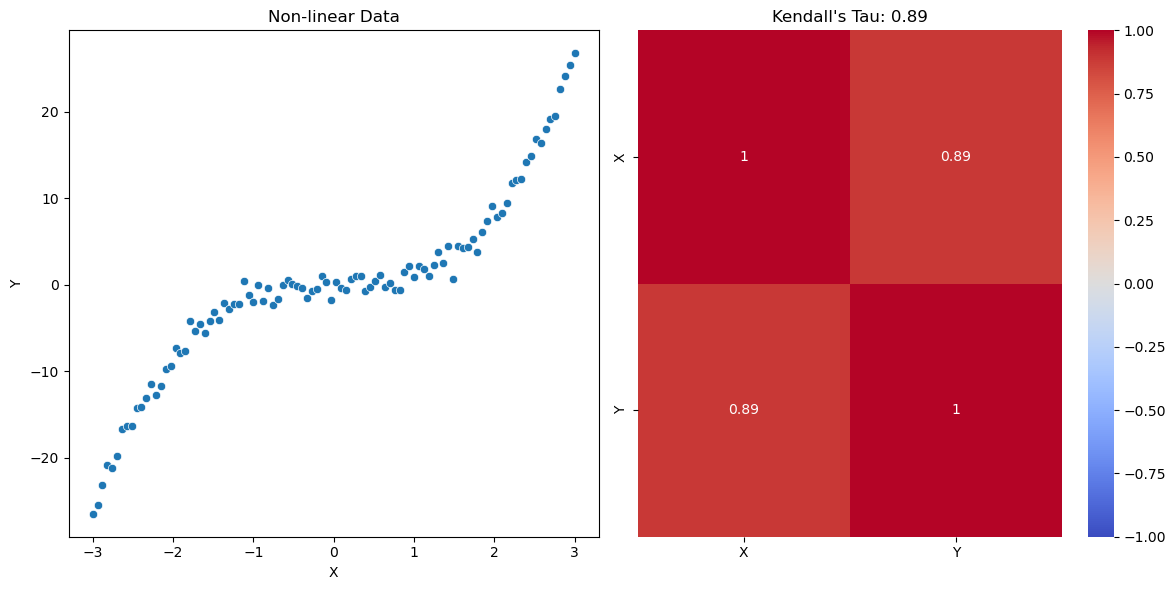

Kendall's Tau Correlation for Non-linear Data: 0.8892929292929294


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau

# Set random seed for reproducibility
np.random.seed(42)

# Generate non-linear data
x_nonlinear = np.linspace(-3, 3, 100)
y_nonlinear = x_nonlinear**3 + np.random.normal(0, 1, 100)

# Create a DataFrame for non-linear data
data_nonlinear = pd.DataFrame({'X': x_nonlinear, 'Y': y_nonlinear})

# Compute Kendall's Tau correlation for non-linear data
kendall_tau, _ = kendalltau(data_nonlinear['X'], data_nonlinear['Y'])

# Plot non-linear data and Kendall's Tau correlation
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.scatterplot(data=data_nonlinear, x='X', y='Y')
plt.title('Non-linear Data')

plt.subplot(122)
sns.heatmap(data_nonlinear.corr(method='kendall'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title(f'Kendall\'s Tau: {kendall_tau:.2f}')

plt.tight_layout()
plt.show()

print("Kendall's Tau Correlation for Non-linear Data:", kendall_tau)


using Kendall's Tau correlation in that context might not be the best representation. For non-linear continuous data, Spearman's rank correlation might be a better choice.

**example that generates synthetic ordinal data**
- computes Kendall's Tau correlation, and creates plots for the ordinal data scenario

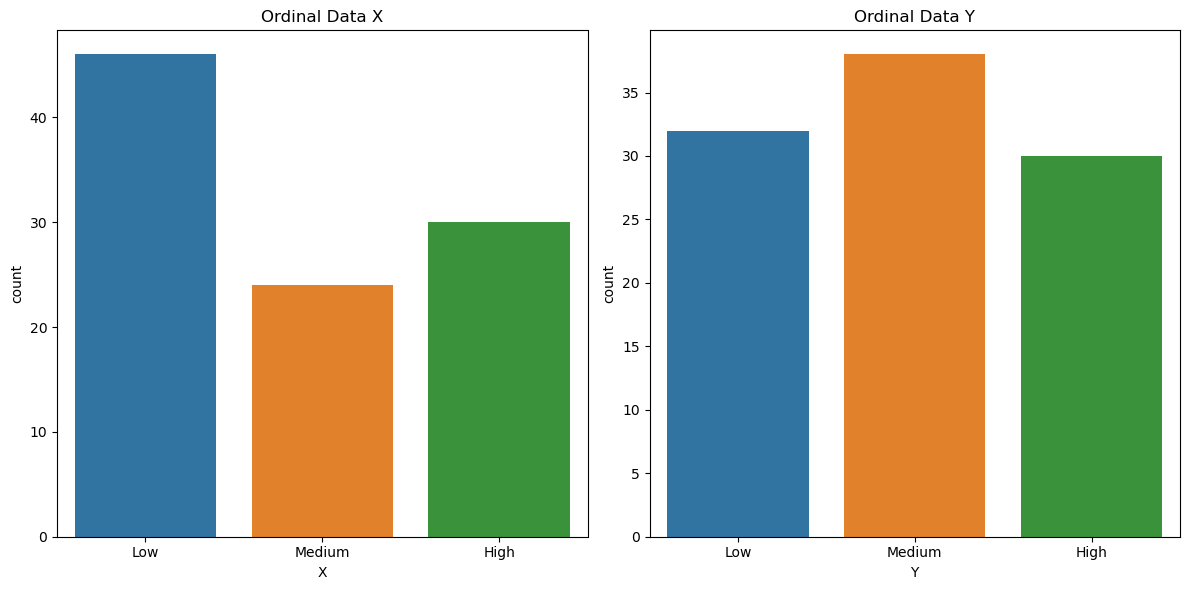

Kendall's Tau Correlation for Ordinal Data: -0.016873655373152607


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau

# Set random seed for reproducibility
np.random.seed(42)

# Generate ordinal data
categories = ['Low', 'Medium', 'High']
x_ordinal = np.random.choice(categories, size=100, p=[0.4, 0.3, 0.3])
y_ordinal = np.random.choice(categories, size=100, p=[0.3, 0.4, 0.3])

# Create a DataFrame for ordinal data
data_ordinal = pd.DataFrame({'X': x_ordinal, 'Y': y_ordinal})

# Convert ordinal categories to integer ranks
category_to_rank = {category: rank for rank, category in enumerate(categories)}
data_ordinal['X_Rank'] = data_ordinal['X'].map(category_to_rank)
data_ordinal['Y_Rank'] = data_ordinal['Y'].map(category_to_rank)

# Compute Kendall's Tau correlation for ordinal data
kendall_tau, _ = kendalltau(data_ordinal['X_Rank'], data_ordinal['Y_Rank'])

# Plot ordinal data and Kendall's Tau correlation
plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(data=data_ordinal, x='X', order=categories)
plt.title('Ordinal Data X')

plt.subplot(122)
sns.countplot(data=data_ordinal, x='Y', order=categories)
plt.title('Ordinal Data Y')

plt.tight_layout()
plt.show()

print("Kendall's Tau Correlation for Ordinal Data:", kendall_tau)


In [65]:
import numpy as np
import pandas as pd
from scipy.stats import kendalltau

# Set random seed for reproducibility
np.random.seed(42)

# Generate ordinal data with intentionally high Kendall's Tau correlation
categories = ['Low', 'Medium', 'High']
x_ordinal = np.random.choice(categories, size=100, p=[0.8, 0.1, 0.1])
y_ordinal = np.random.choice(categories, size=100, p=[0.8, 0.1, 0.1])

# Create a DataFrame for ordinal data
data_ordinal_high_corr = pd.DataFrame({'X': x_ordinal, 'Y': y_ordinal})

# Convert ordinal categories to integer ranks
category_to_rank = {category: rank for rank, category in enumerate(categories)}
data_ordinal_high_corr['X_Rank'] = data_ordinal_high_corr['X'].map(category_to_rank)
data_ordinal_high_corr['Y_Rank'] = data_ordinal_high_corr['Y'].map(category_to_rank)

# Compute Kendall's Tau correlation for ordinal data
kendall_tau_high_corr, _ = kendalltau(data_ordinal_high_corr['X_Rank'], data_ordinal_high_corr['Y_Rank'])

print("Kendall's Tau Correlation for Ordinal Data with High Correlation:", kendall_tau_high_corr)
print(data_ordinal_high_corr)


Kendall's Tau Correlation for Ordinal Data with High Correlation: -0.04632015146737169
       X       Y  X_Rank  Y_Rank
0    Low     Low       0       0
1   High     Low       2       0
2    Low     Low       0       0
3    Low     Low       0       0
4    Low    High       0       2
..   ...     ...     ...     ...
95   Low     Low       0       0
96   Low     Low       0       0
97   Low  Medium       0       1
98   Low  Medium       0       1
99   Low     Low       0       0

[100 rows x 4 columns]
